<IPython.core.display.Javascript object>


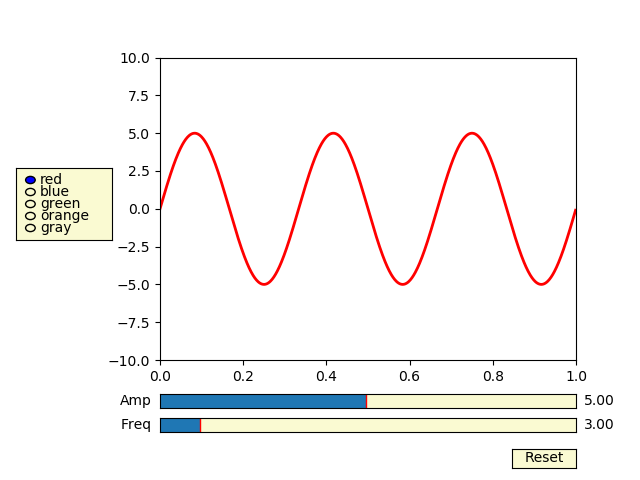

In [2]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
class widgets_sample(object):
    def __init__(self):

        self.fig, ax = plt.subplots()
        plt.subplots_adjust(left=0.25, bottom=0.25)
        self.t = np.arange(0.0, 1.0, 0.001)
        a0 = 5
        f0 = 3
        s = a0*np.sin(2*np.pi*f0*self.t)
        self.l, = plt.plot(self.t, s, lw=2, color='red')
        plt.axis([0, 1, -10, 10])

        axcolor = 'lightgoldenrodyellow'
        axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
        axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

        self.sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
        self.samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)
        self.sfreq.on_changed(self.update)
        self.samp.on_changed(self.update)

        resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
        self.button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')
        self.button.on_clicked(self.reset)

        rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
        self.radio = RadioButtons(rax, ('red', 'blue', 'green', 'orange', 'gray'), active=0)
        self.radio.on_clicked(self.colorfunc)

        plt.show()

    def update(self,val):
        amp = self.samp.val
        freq = self.sfreq.val
        self.l.set_ydata(amp*np.sin(2*np.pi*freq*self.t))
        self.fig.canvas.draw_idle()

    def reset(self, event):
        self.sfreq.reset()
        self.samp.reset()

    def colorfunc(self, label):
        self.l.set_color(label)
        self.fig.canvas.draw_idle()

widgets_sample()